In [27]:
from scipy.io import arff
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
data = arff.loadarff('messidor_features.arff')
df = pd.DataFrame(data[0])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


In [14]:
df.columns=[ "q",      #  0 The binary result of quality assessment. 0 = bad quality 1 = sufficient quality
        "ps",     #  1 The binary result of pre-screening, 1 indicates severe retinal abnormality and 0 its lack
        "nma_0.5",  #  2 Number of MAs found at the confidence levels alpha = 0.5
        "nma_0.6",  #  3 Number of MAs found at the confidence levels alpha = 0.6
        "nma_0.7",  #  4 Number of MAs found at the confidence levels alpha = 0.7
        "nma_0.8",  #  5 Number of MAs found at the confidence levels alpha = 0.8
        "nma_0.9",  #  6 Number of MAs found at the confidence levels alpha = 0.9
        "nma_1",  #  7 Number of MAs found at the confidence levels alpha = 1.0
        "nex_0.5",  #  8 Number of Exudates found at the confidence levels alpha = 0.5
        "nex_0.6",  #  9 Number of Exudates found at the confidence levels alpha = 0.6
        "nex_0.7",  # 10 Number of Exudates found at the confidence levels alpha = 0.7
        "nex_0.8",  # 11 Number of Exudates found at the confidence levels alpha = 0.8
        "nex_0.9",  # 12 Number of Exudates found at the confidence levels alpha = 0.9
        "nex_1",  # 13 Number of Exudates found at the confidence levels alpha = 1.0
        "nex.f",  # 14 Number of Exudates found at the confidence levels alpha = 1.0
        "nex.h",  # 15 Number of Exudates found at the confidence levels alpha = 1.0
        "dd",     # 16 The euclidean distance of the center of the macula and the center of the optic disc
        "dm",     # 17 The diameter of the optic disc
        "amfm",   # 18 The binary result of the AM/FM-based classification # Source
        "target"   ]
df.head()

,q,ps,nma_0.5,nma_0.6,nma_0.7,nma_0.8,nma_0.9,nma_1,nex_0.5,nex_0.6,nex_0.7,nex_0.8,nex_0.9,nex_1,nex.f,nex.h,dd,dm,amfm,target
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


In [17]:
target=df.target
features = df.drop(['target'], axis=1)


In [18]:
target

0       b'0'
1       b'0'
2       b'1'
3       b'0'
4       b'1'
        ... 
1146    b'0'
1147    b'0'
1148    b'0'
1149    b'1'
1150    b'0'
Name: target, Length: 1151, dtype: object

In [19]:
features.head()

,q,ps,nma_0.5,nma_0.6,nma_0.7,nma_0.8,nma_0.9,nma_1,nex_0.5,nex_0.6,nex_0.7,nex_0.8,nex_0.9,nex_1,nex.f,nex.h,dd,dm,amfm
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0


Number of Normal Eye:  540
Number of DR Eye:  611


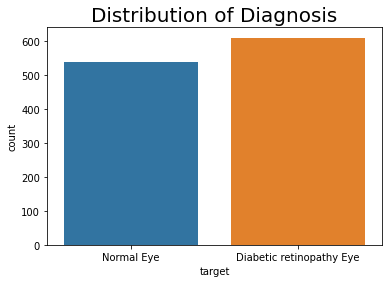

In [28]:
countPlot = sns.countplot(x='target', data=df);
badEye, normal = target.value_counts()
plt.title('Distribution of Diagnosis', fontsize=20)
countPlot.set_xticklabels(['Normal Eye', 'Diabetic retinopathy Eye'])
print('Number of Normal Eye: ', normal)
print('Number of Bad Eye: ', badEye)

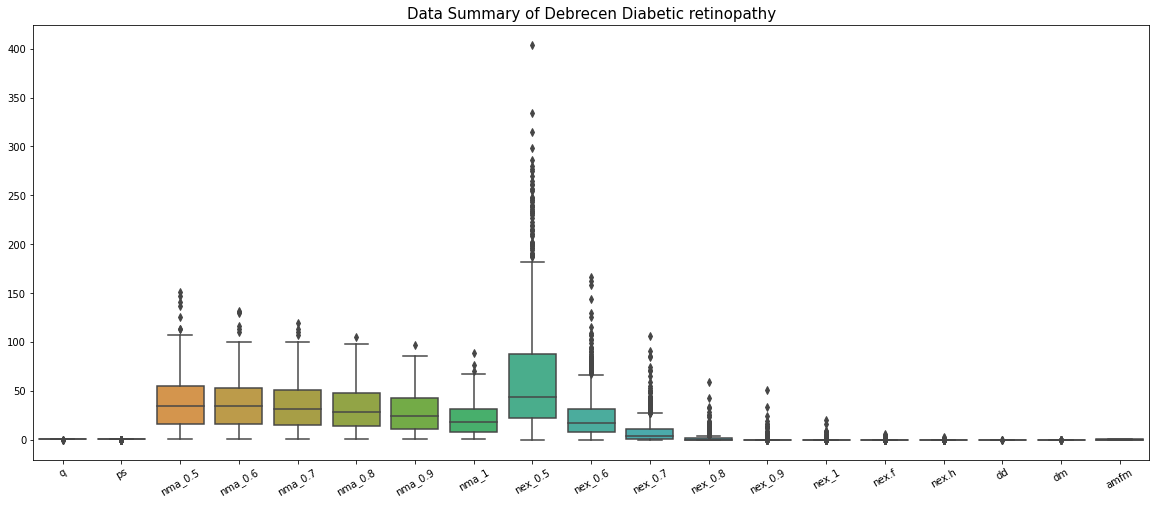

In [29]:
plt.figure(figsize=(20,8))
plt.title("Data Summary of Debrecen Diabetic retinopathy", fontsize=15)
sns.boxplot(data=df, orient='v');
plt.xticks(rotation=30);

In [31]:
num_features = features.drop(['q', 'ps', 'amfm'], axis=1)
num_features_norm = (num_features - num_features.mean()) / (num_features.std())

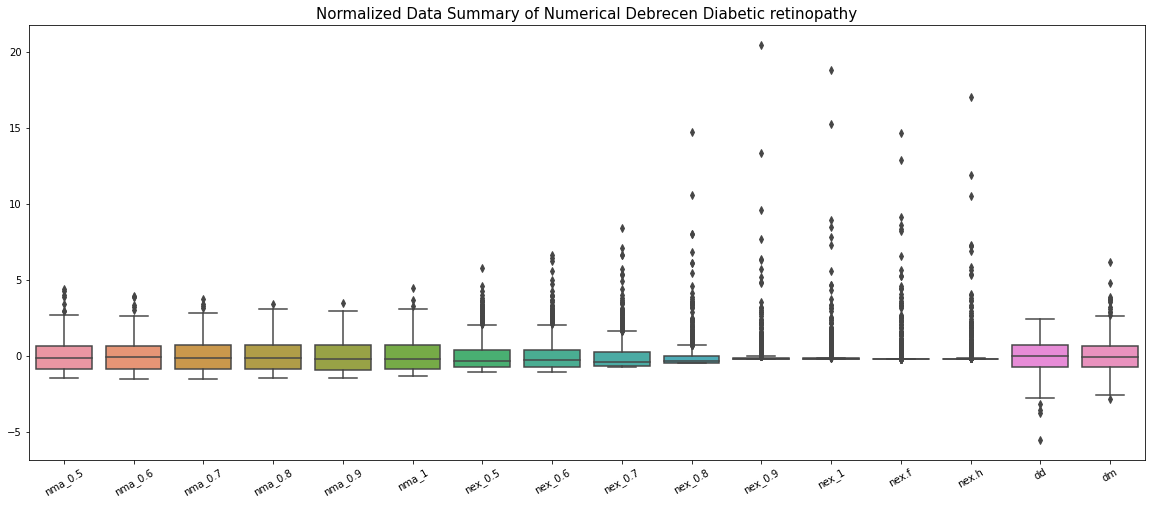

In [58]:
plt.figure(figsize=(20,8))
plt.title("Normalized Data Summary of Numerical Debrecen Diabetic retinopathy", fontsize=15)
sns.boxplot(data=num_features_norm, orient='v');
plt.xticks(rotation=30);

Number of Bad Quality:  4
Number of Sufficient Quality:  1147


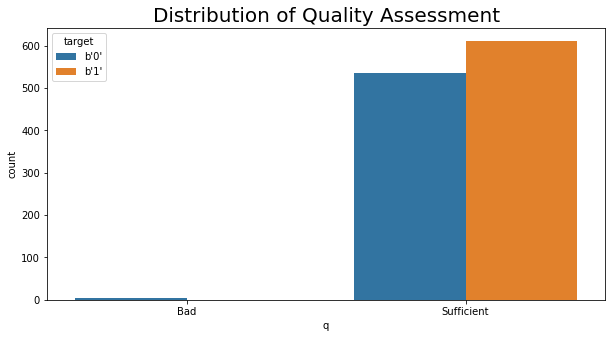

In [35]:
plt.figure(figsize=(10,5))
qualityCount = sns.countplot(x='q', hue=target, data=df);
good, bad = features['q'].value_counts()
plt.title('Distribution of Quality Assessment', fontsize=20)
qualityCount.set_xticklabels(['Bad', 'Sufficient'])


print('Number of Bad Quality: ', bad)
print('Number of Sufficient Quality: ', good)

Number of Severe Retinal Abnormality:  1057
Number of Retinal Lack Abnormality:  94


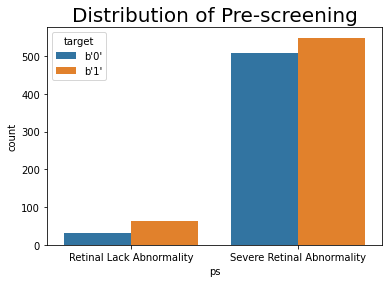

In [36]:
preScreen = sns.countplot(x='pre-screen', hue=target, data=df);
abnormal, fine = features['ps'].value_counts()
plt.title('Distribution of Pre-screening', fontsize=20)
preScreen.set_xticklabels(['Retinal Lack Abnormality', 'Severe Retinal Abnormality'])
# plt.savefig('study_case/ps_sample.png')

print('Number of Severe Retinal Abnormality: ', abnormal)
print('Number of Retinal Lack Abnormality: ', fine)

Number of Normal Eye:  764
Number of Diabetic retinopathy Eye:  387


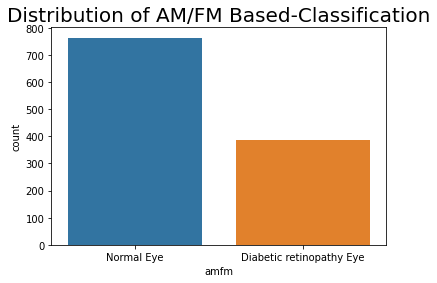

In [38]:
amfm = sns.countplot(x='amfm', data=df);
normal, diabetic = features['amfm'].value_counts()
plt.title('Distribution of AM/FM Based-Classification', fontsize=20)
amfm.set_xticklabels(['Normal Eye', 'Diabetic retinopathy Eye'])
# plt.savefig('study_case/ps_sample.png')

print('Number of Normal Eye: ', normal)
print('Number of Diabetic retinopathy Eye: ', diabetic)

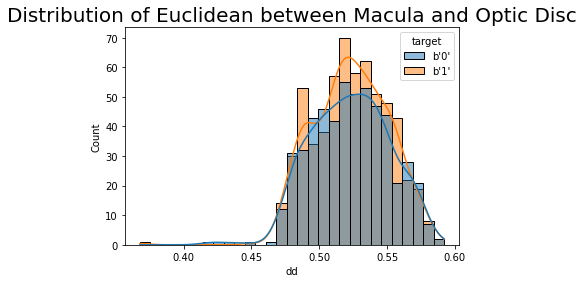

In [41]:
plt.title('Distribution of Euclidean between Macula and Optic Disc', fontsize=20)
sns.histplot(data=df, x='dd', hue='target', kde=True);

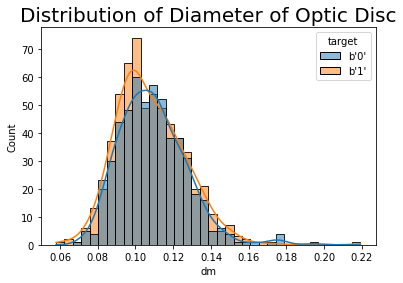

In [43]:
plt.title('Distribution of Diameter of Optic Disc', fontsize=20)
sns.histplot(data=df, x='dm', hue='target', kde=True);

In [47]:
symptoms = [sym for sym in df.columns if sym.startswith('nma_') or sym.startswith('nex') ]
mas = [ma for ma in df.columns if ma.startswith('nma_')]
exus= [exu for exu in df.columns if exu.startswith('nex')]
print('syms = ', symptoms, '\n')
print('MAs = ', mas, '\n')
print('exus = ', exus, '\n')

syms =  ['nma_0.5', 'nma_0.6', 'nma_0.7', 'nma_0.8', 'nma_0.9', 'nma_1', 'nex_0.5', 'nex_0.6', 'nex_0.7', 'nex_0.8', 'nex_0.9', 'nex_1', 'nex.f', 'nex.h'] 

MAs =  ['nma_0.5', 'nma_0.6', 'nma_0.7', 'nma_0.8', 'nma_0.9', 'nma_1'] 

exus =  ['nex_0.5', 'nex_0.6', 'nex_0.7', 'nex_0.8', 'nex_0.9', 'nex_1', 'nex.f', 'nex.h'] 



<Figure size 2880x1800 with 0 Axes>

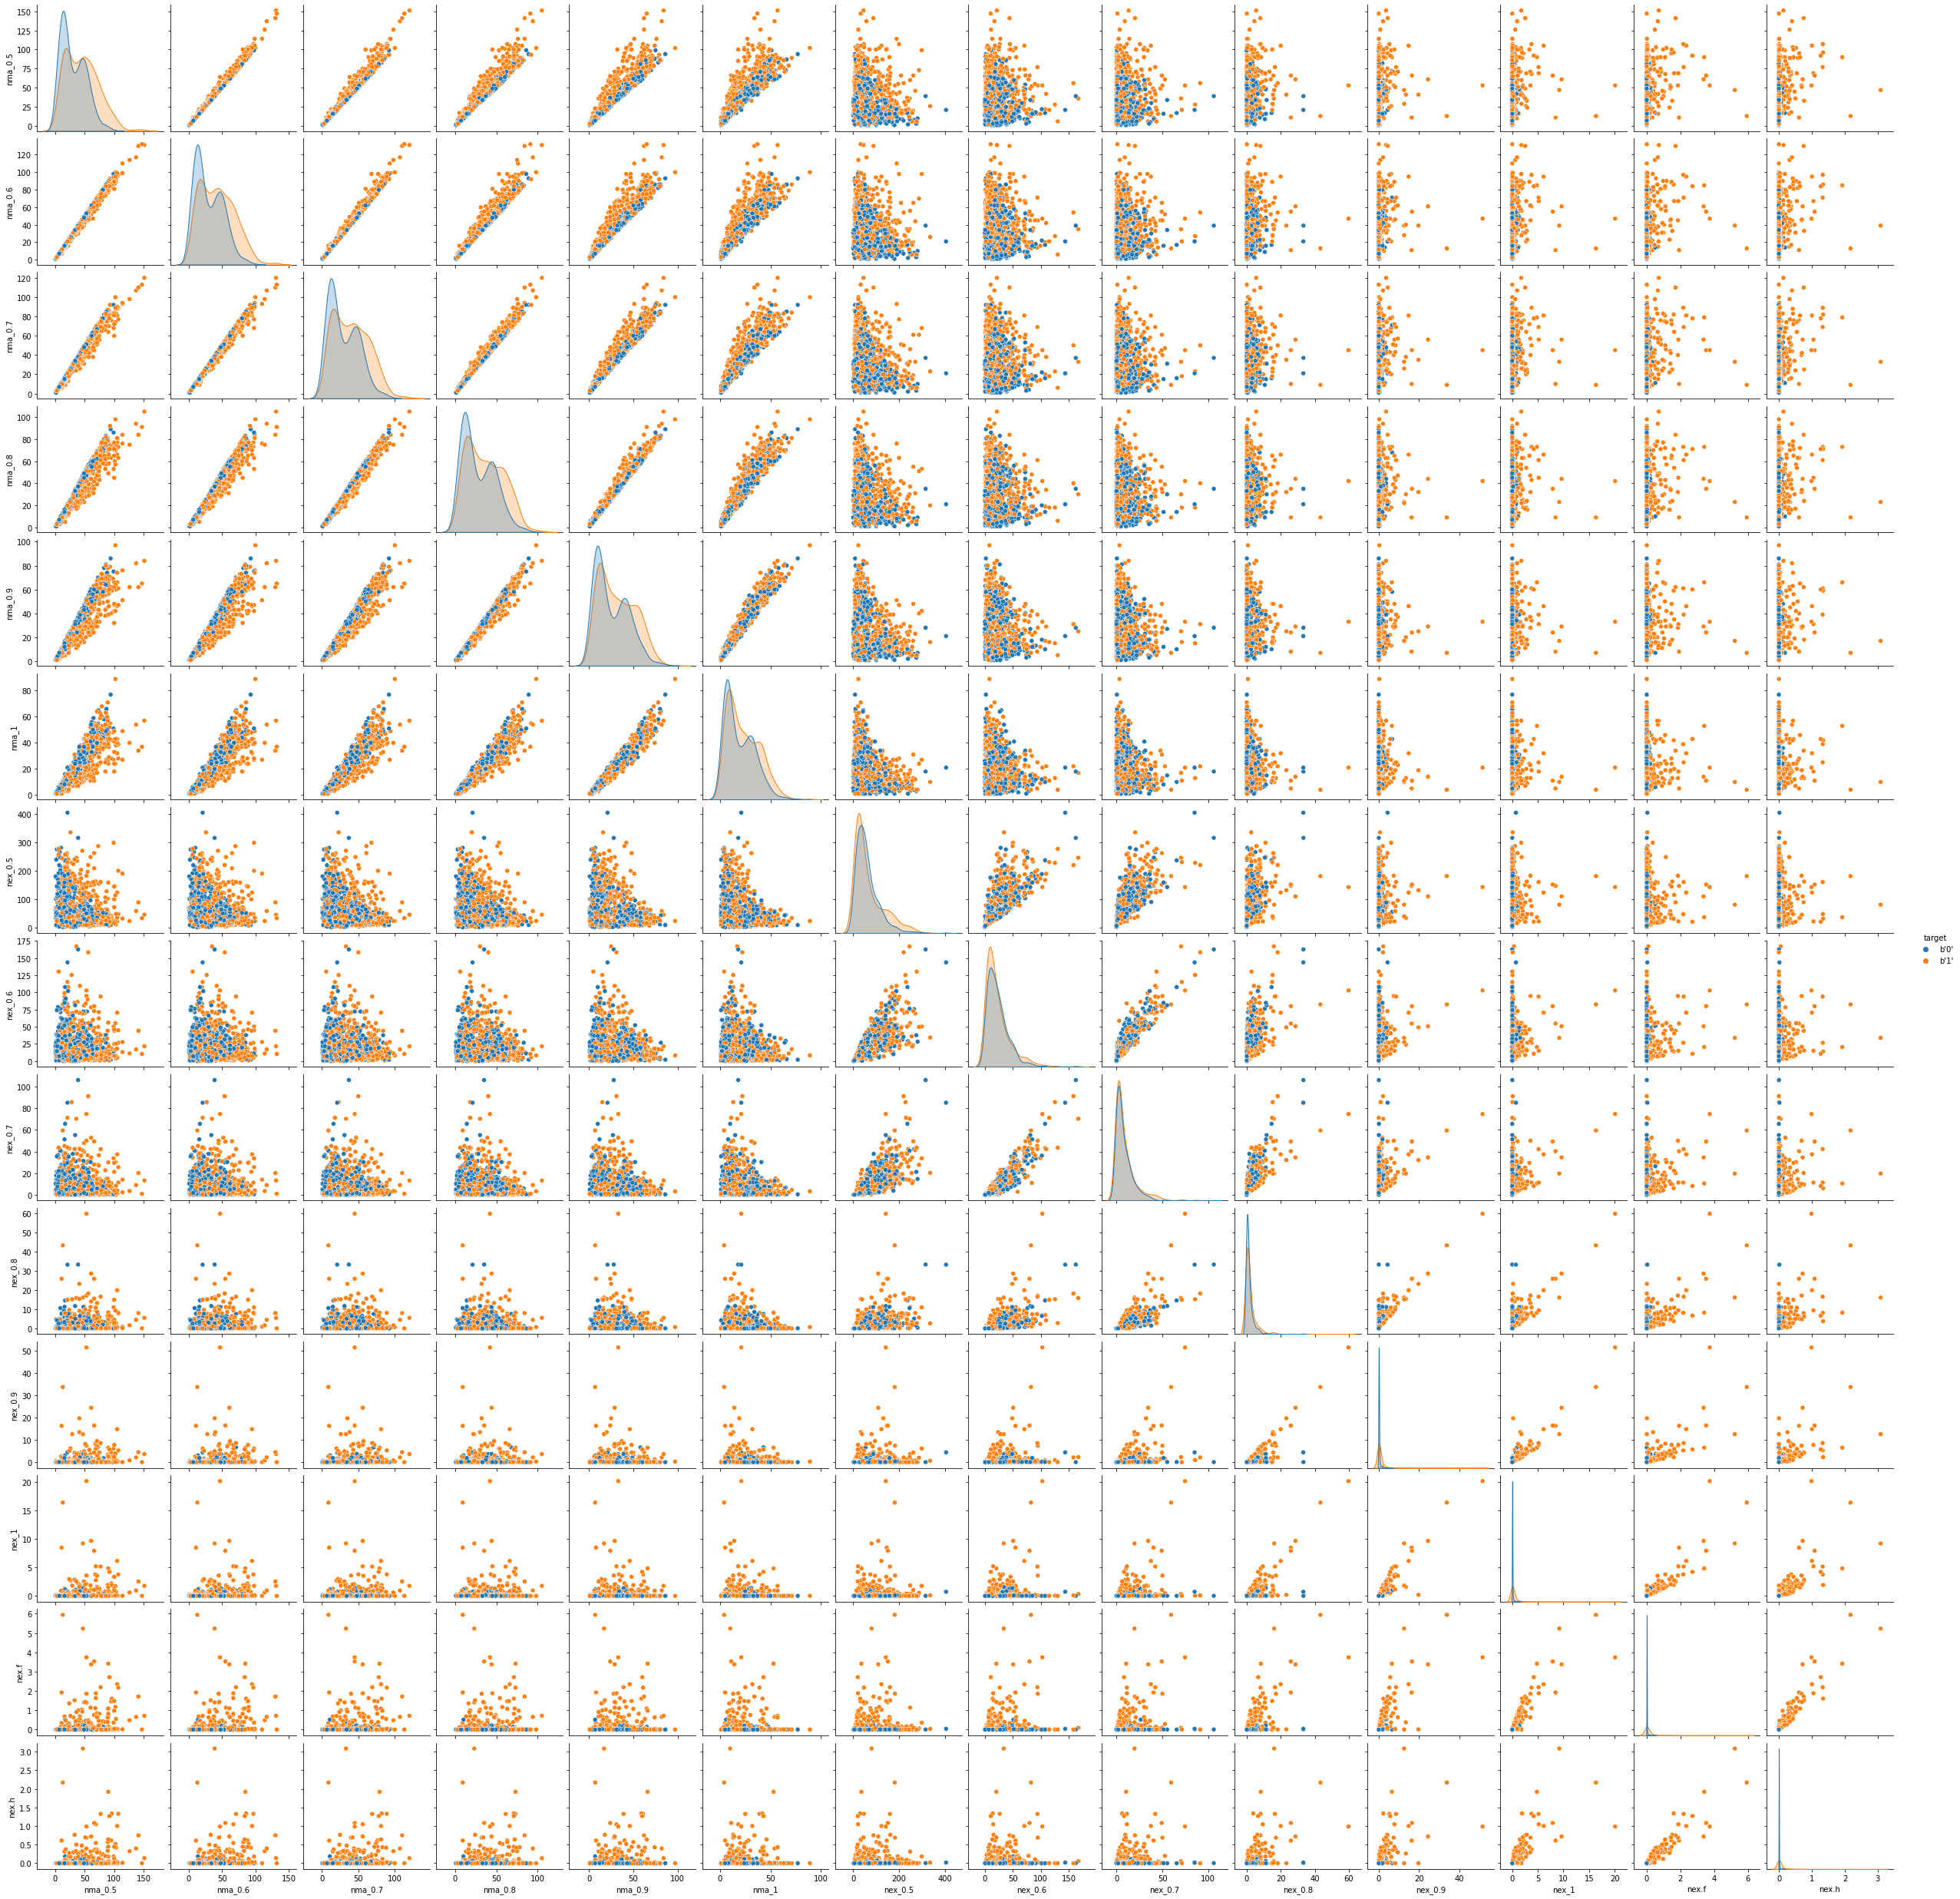

In [52]:
diag_syms = symptoms[:]
diag_MAs = mas[:]
diag_exus = exus[:]

# Insert the diagnosis
diag_syms.insert(6, 'target')
diag_MAs.insert(6, 'target')
diag_exus.insert(6, 'target')
plt.figure(figsize=(40,25));
sns.pairplot(df[diag_syms], hue='target');

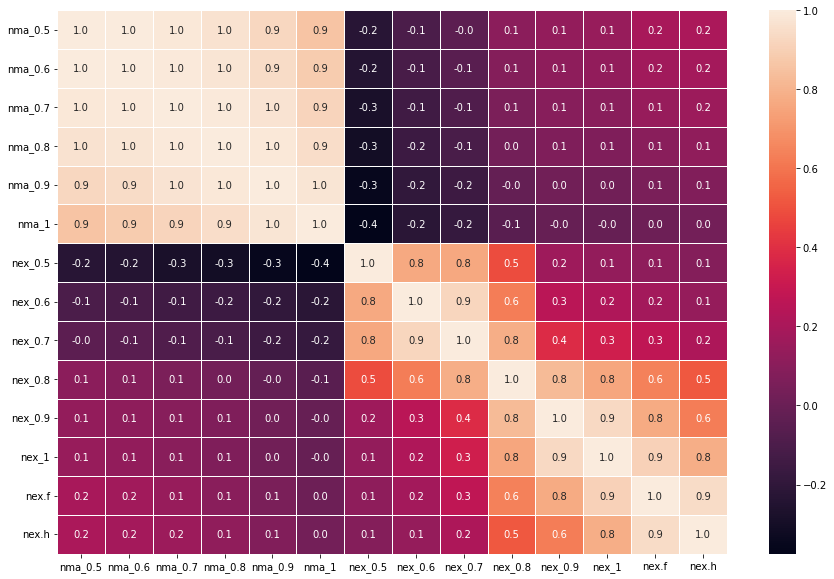

In [53]:
corr_syms = features[symptoms].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_syms, annot=True, linewidths=.7, fmt=".1f");

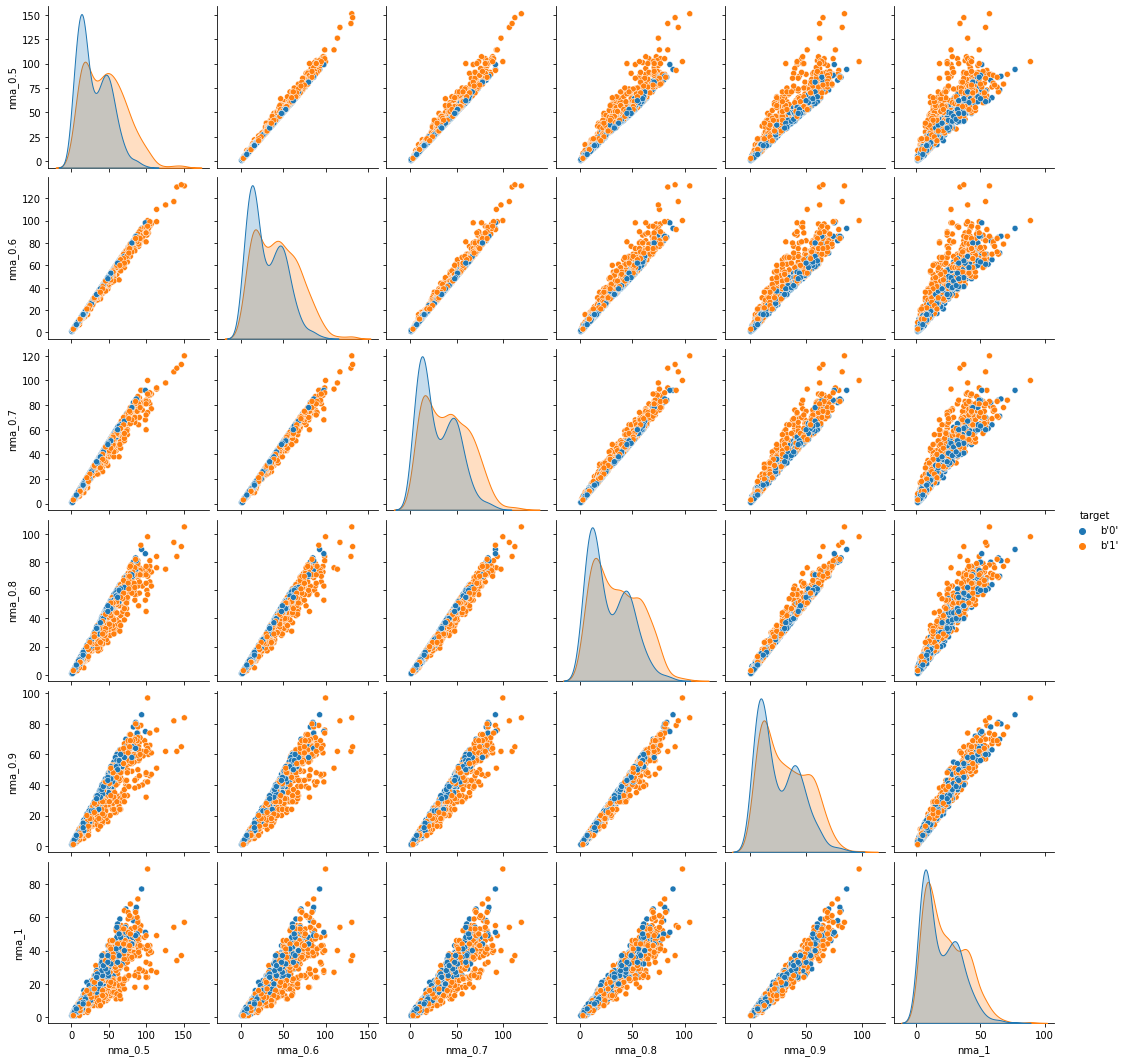

In [55]:
sns.pairplot(df[diag_MAs], hue='target');

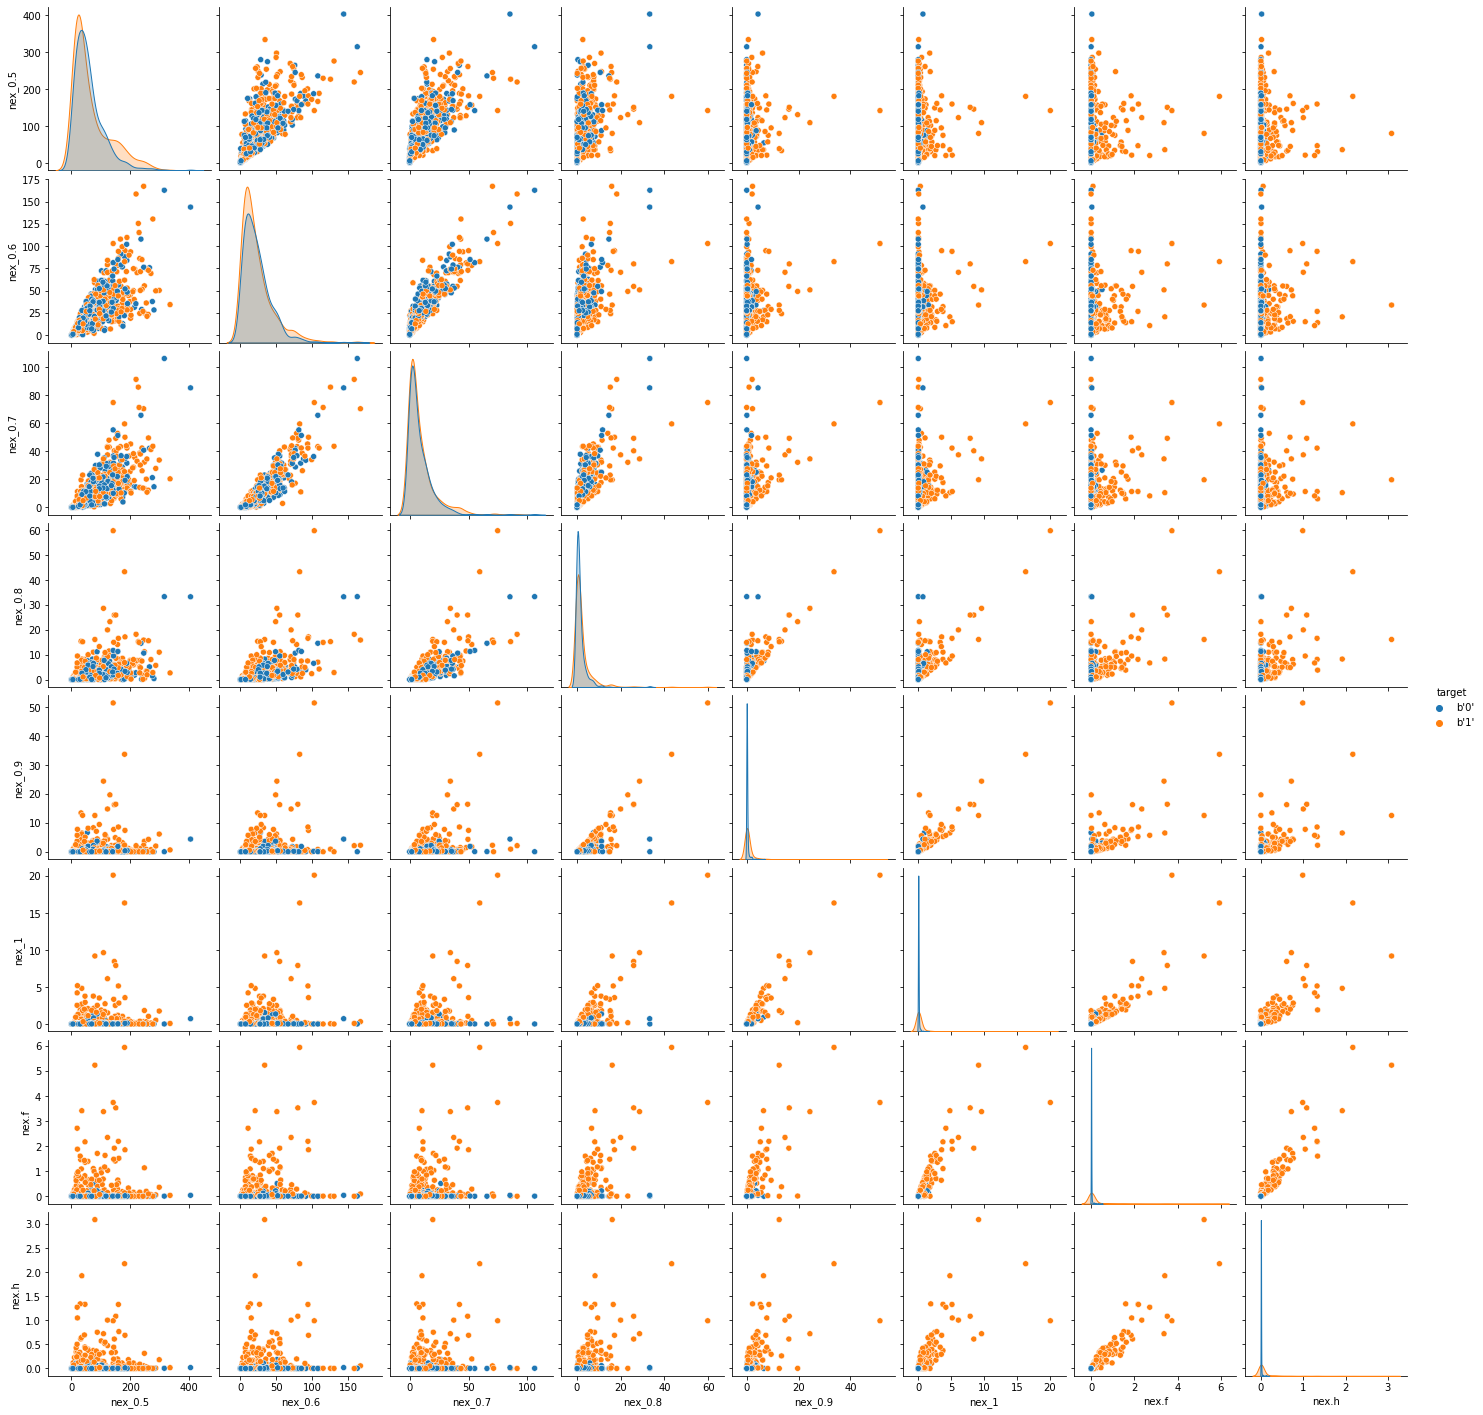

In [57]:
sns.pairplot(df[diag_exus], hue='target');